# **BOX PLOT**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Set display max
pd.set_option('display.max_columns', None)

---

#### CONNECT TO DATABASE

In [ ]:
# Connect
conn = sqlite3.connect('my_analysis.db')

# Check
query = "SELECT COUNT(*) FROM main"
pd.read_sql_query(query, conn)

,COUNT(*)
0,65437


In [3]:
# Check all tables available
query = "SELECT name AS Table_Name FROM sqlite_master WHERE type == 'table'"

pd.read_sql_query(query, conn)

,Table_Name
0,main


In [4]:
# Group Data by Age
query = "SELECT Age, COUNT(*) AS Count FROM main GROUP BY Age ORDER BY Count DESC"

pd.read_sql_query(query, conn)

,Age,Count
0,25-34 years old,23911
1,35-44 years old,14942
2,18-24 years old,14098
3,45-54 years old,6249
4,55-64 years old,2575
5,Under 18 years old,2568
6,65 years or older,772
7,Prefer not to say,322


---

#### VISUALIZING DATA

Visualizing Distribution of Data

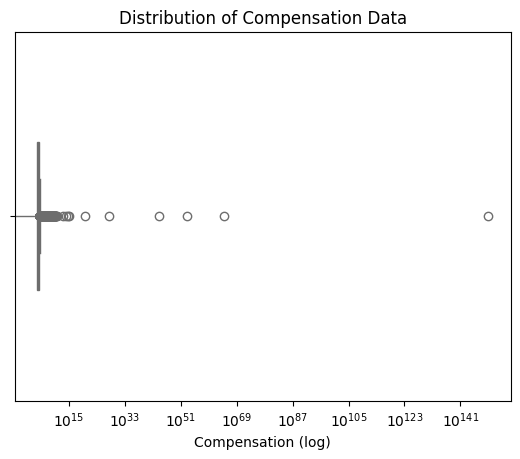

In [11]:
# --- Box Plot of CompTotal (Total Compensation) ---

# Query the data
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
comp_data = pd.read_sql_query(query, conn)

# BOX PLOT
sns.boxplot(comp_data, x='CompTotal', width=0.4, color='salmon')

plt.title("Distribution of Compensation Data")
plt.xlabel("Compensation (log)")
plt.xscale('log')  # <-- convert to log to make it more visible

plt.show()

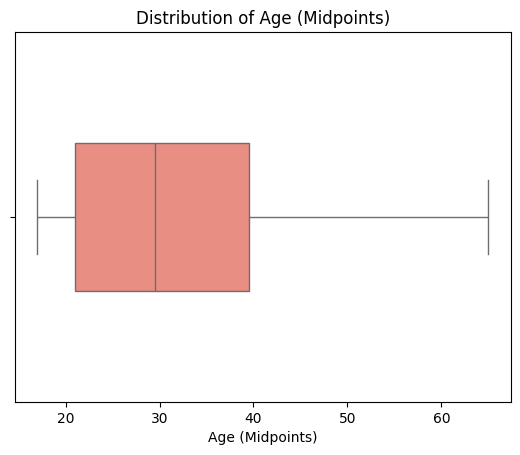

In [10]:
# --- Box Plot of Age (Converted to Numeric Values) ---

# Query the data
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
age_data = pd.read_sql_query(query, conn)

# Determine Midpoints and Convert to Numeric Values
# All Midpoints values were estimated
age_map = {
    'Under 18 years old': 17,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '55-64 years old': 59.5,
    '65 years or older': 65
}

# Create new column and apply the map
age_data['Num_Age'] = age_data['Age'].map(age_map)

# BOX PLOT
sns.boxplot(age_data, x='Num_Age', width=0.4, color='salmon')

plt.title("Distribution of Age (Midpoints)")
plt.xlabel('Age (Midpoints)')

plt.show()

---

Visualizing Relationship of Data

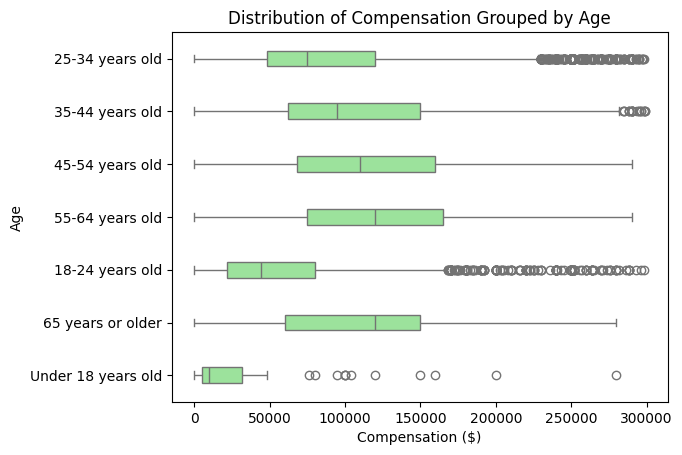

In [19]:
# Box Plot of CompTotal Grouped by Age Groups

# Query
query = "SELECT CompTotal, Age FROM main WHERE CompTotal IS NOT NULL AND Age IS NOT NULL"
ca_df = pd.read_sql_query(query, conn)

# Filter compensation to a reasonable amount
filtered = ca_df[(ca_df['CompTotal'] < 300000) &
                 (ca_df['Age'] != 'Prefer not to say')]

# BOX PLOT
sns.boxplot(filtered, x='CompTotal', y='Age', width=0.3, color='lightgreen')

plt.title('Distribution of Compensation Grouped by Age')
plt.xlabel('Compensation ($)')

plt.show()

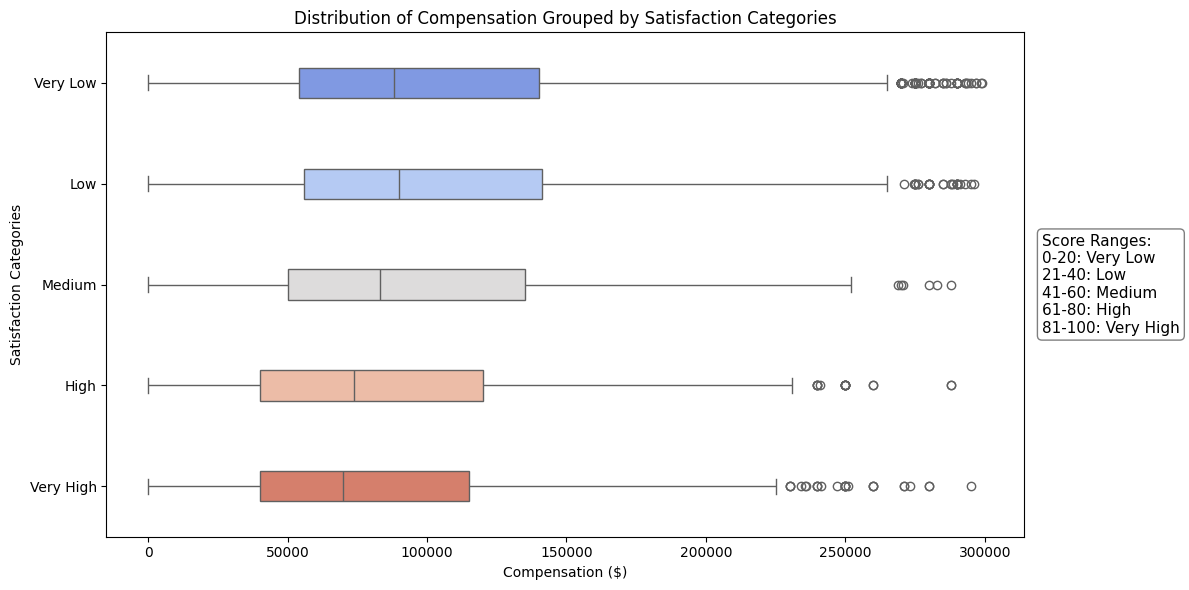

In [32]:
# Box Plot of CompTotal Grouped by Job Satisfaction (JobSatPoints_6)

# Query the data
query = "SELECT CompTotal, JobSatPoints_6 AS JobSat6 FROM main"
cj_df = pd.read_sql_query(query, conn).dropna()

# Categorize JobSat values into several categories
# Grouping the values from 0-100 into 5 distinct categories
# Create bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create new column
cj_df['Satisfaction_Group'] = pd.cut(cj_df['JobSat6'], bins=bins, labels=labels)

# BOX PLOT
# Filter Compensation values to reasonable amount
filtered = cj_df[cj_df['CompTotal'] < 300000]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(filtered, x='CompTotal', y='Satisfaction_Group', width=0.3, palette='coolwarm', hue='Satisfaction_Group', legend=False)

plt.title('Distribution of Compensation Grouped by Satisfaction Categories')
plt.xlabel('Compensation ($)')
plt.ylabel('Satisfaction Categories')

# Define your explanation text
text_str = (
    "Score Ranges:\n"
    "0-20: Very Low\n"
    "21-40: Low\n"
    "41-60: Medium\n"
    "61-80: High\n"
    "81-100: Very High"
)

# Place a text box outside the plot
# bbox_to_anchor moves it to the right side
plt.text(1.02, 0.5, text_str, fontsize=11, transform=plt.gca().transAxes,
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

---

#### Visualizing the Composition of Data

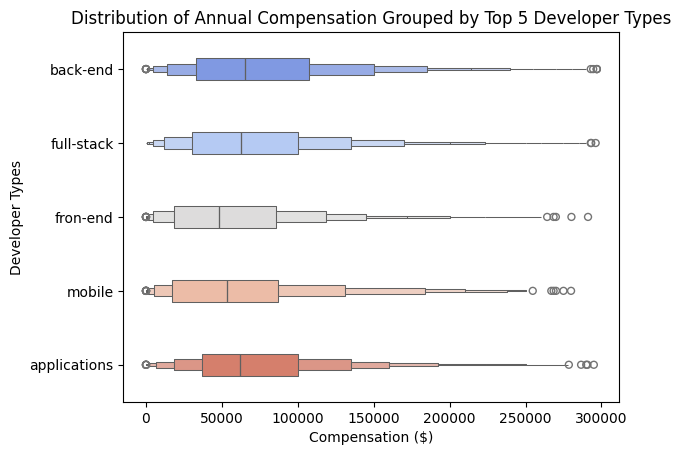

In [65]:
# Box Plot ConvertedCompYearly for the top 5 Developer types
query = """
SELECT DevType, ConvertedCompYearly 
FROM main
WHERE DevType IN (
    SELECT DevType
    FROM main
    GROUP BY DevType
    ORDER BY COUNT(ConvertedCompYearly) DESC
    LIMIT 5)
"""

cd_df = pd.read_sql_query(query, conn).dropna()

# Shorten Developer types values
devtype = {
    'Developer, back-end': 'back-end',
    'Developer, full-stack': 'full-stack',
    'Developer, front-end': 'fron-end', 
    'Developer, mobile': 'mobile',
    'Developer, desktop or enterprise applications': 'applications'
}

cd_df['DevType_short'] = cd_df['DevType'].map(devtype)

# BOX PLOT
filtered = cd_df[cd_df['ConvertedCompYearly'] < 300000]

sns.boxenplot(filtered, x='ConvertedCompYearly', y='DevType_short', width=0.3, palette='coolwarm', hue='DevType_short', legend=False)

plt.title('Distribution of Annual Compensation Grouped by Top 5 Developer Types')
plt.xlabel('Compensation ($)')
plt.ylabel('Developer Types')

plt.show()

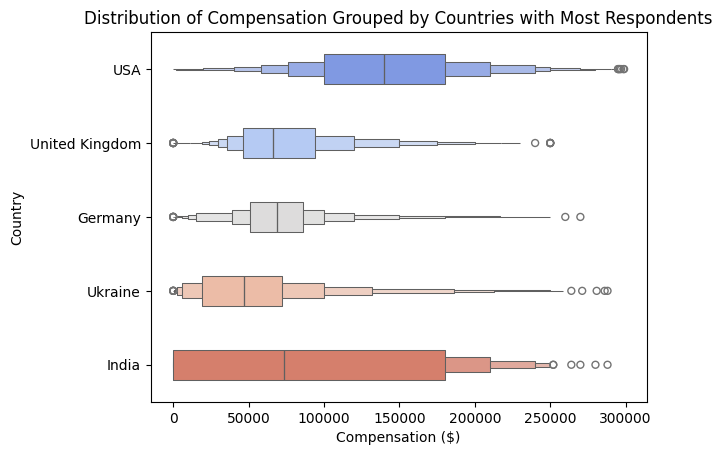

In [75]:
# Box Plot of CompTotal for the Top 5 Countries
query = """
SELECT CompTotal, Country 
FROM main 
WHERE Country IN (
    SELECT Country
    FROM main
    WHERE CompTotal IS NOT NULL
    GROUP BY Country
    ORDER BY COUNT(*) DESC
    LIMIT 5)
"""
cc_df = pd.read_sql_query(query, conn)

# Shorten countries name
countries = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
}

cc_df['Country'] = cc_df['Country'].replace(countries)

# BOX PLOT
filtered = cc_df[cc_df['CompTotal'] < 300000]
sns.boxenplot(filtered, x='CompTotal', y='Country', width=0.4, palette='coolwarm', hue='Country', legend=False)

plt.title('Distribution of Compensation Grouped by Countries with Most Respondents')
plt.xlabel('Compensation ($)')

plt.show()

---

#### VISUALIZING COMPARISON OF DATA

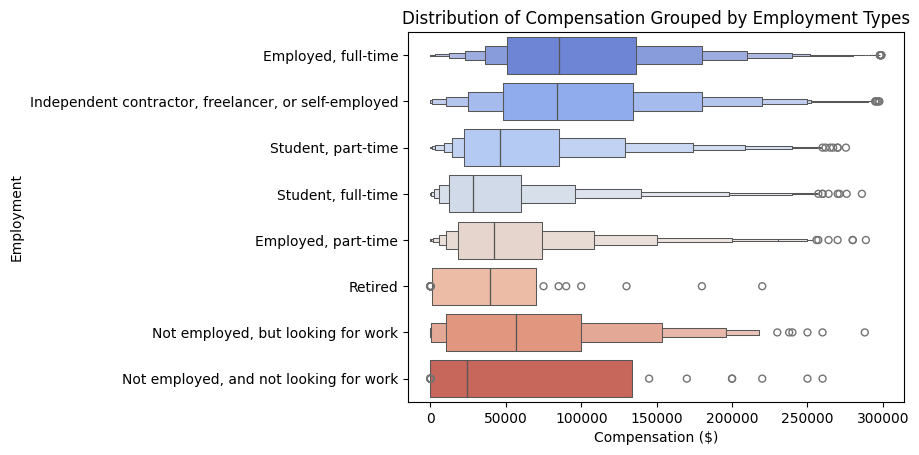

In [89]:
# Box Plot of CompTotal Across Employment Types
query = "SELECT CompTotal, Employment FROM main WHERE CompTotal IS NOT NULL AND CompTotal < 300000"
employment_df = pd.read_sql_query(query, conn)

# Fix values in employment column
employment_df['Splited_Employment'] = employment_df['Employment'].str.split(';')
emp_df = employment_df.explode(column="Splited_Employment")

# BOX PLOT
sns.boxenplot(emp_df, x='CompTotal', y='Splited_Employment', palette='coolwarm', hue='Splited_Employment', legend=False)

plt.title("Distribution of Compensation Grouped by Employment Types")
plt.ylabel('Employment')
plt.xlabel('Compensation ($)')

plt.show()


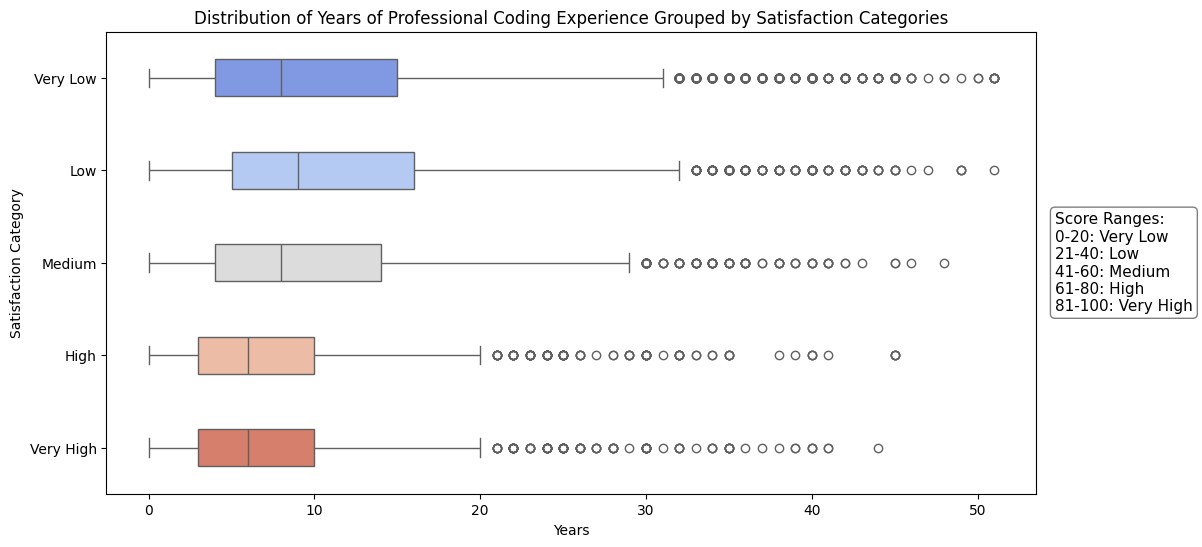

In [105]:
# Box Plot of YearsCodePro by Job Satisfaction (JobSatPoint_6)

query = "SELECT YearsCodePro, JobSatPoints_6 AS JobSat6 FROM main WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
yj_df = pd.read_sql_query(query, conn)

# Fix values for better readability
years_map = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}
yj_df['YearsCodePro'] = yj_df['YearsCodePro'].replace(years_map).astype('int')

# Categorize Satisfaction Score for better visibility
bins = [-1, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
yj_df['Satisfaction_Group'] = pd.cut(yj_df['JobSat6'], bins=bins, labels=labels)

# BOX PLOT
plt.figure(figsize=(12, 6))
sns.boxplot(yj_df, x='YearsCodePro', y='Satisfaction_Group', palette='coolwarm', hue='Satisfaction_Group', legend=False, width=0.4)

plt.title("Distribution of Years of Professional Coding Experience Grouped by Satisfaction Categories")
plt.xlabel("Years")
plt.ylabel('Satisfaction Category')

plt.text(1.02, 0.5, text_str, fontsize=11,transform=plt.gca().transAxes,
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.show()

---

In [106]:
conn.close()

---

#### **SUMMARY**

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.